# Trabajo Práctico n° 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Árboles de Decisión - Regresión

In [2]:
df = pd.read_csv('1000_Companies.csv')

In [3]:
df.head(2)

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


## Análisis Exploratorio

### Distribuciones de las variables

In [4]:
df

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [5]:
df.columns

Index(['RyD_Spend', 'Administration', 'MarketingSpend', 'State', 'Profit'], dtype='object')

In [30]:
df.describe()

,RyD_Spend,Administration,MarketingSpend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


array([[<Axes: title={'center': 'RyD_Spend'}>,
        <Axes: title={'center': 'Administration'}>],
       [<Axes: title={'center': 'MarketingSpend'}>,
        <Axes: title={'center': 'Profit'}>]], dtype=object)

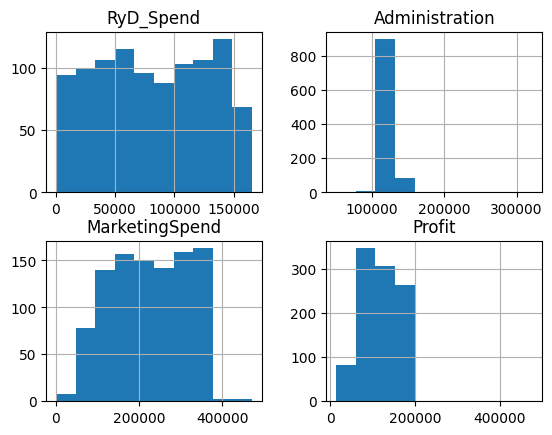

In [31]:
df.hist()

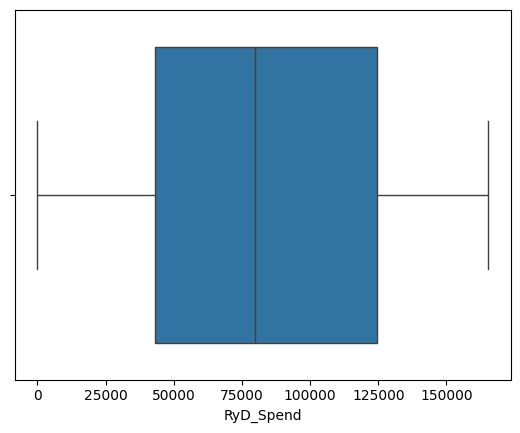

In [6]:
import seaborn as sns

sns.boxplot(data = df, x='RyD_Spend')

plt.show()

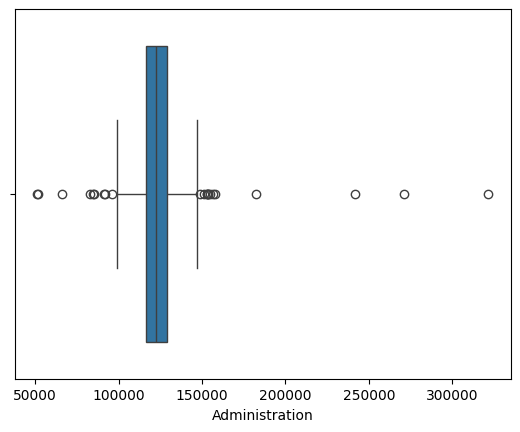

In [7]:
sns.boxplot(data = df, x='Administration')

plt.show()

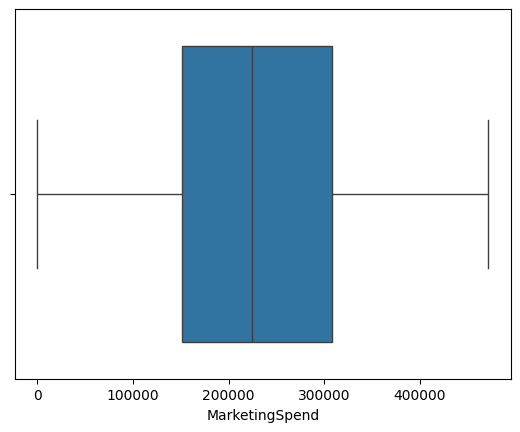

In [8]:
sns.boxplot(data = df, x='MarketingSpend')
plt.show()

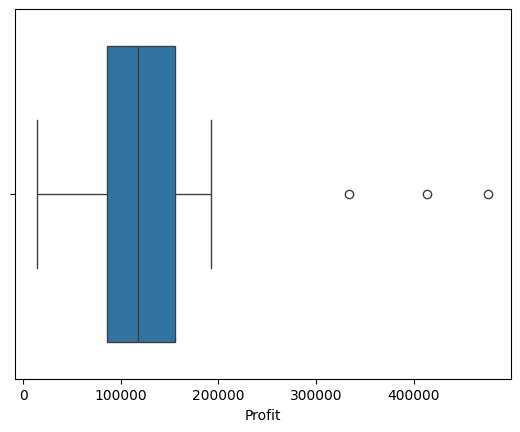

In [9]:
sns.boxplot(data = df, x='Profit')
plt.show()

### Escalado

Debido a la cantidad de valores atípicos se decidió utilizar un escalado robusto el cual es menos sensible a outliers que el escalado estándar.

In [10]:
from sklearn.preprocessing import RobustScaler

escalador = RobustScaler()

arr = escalador.fit_transform(df.drop('State', axis=1))

arr

array([[ 1.0482591 ,  1.15824021,  1.57273795,  1.07160958],
       [ 1.01449049,  2.31676863,  1.39537165,  1.0648633 ],
       [ 0.90211841, -1.70229835,  1.16662251,  1.05421231],
       ...,
       [ 0.24962224,  9.56157435,  0.0166959 ,  4.25532644],
       [ 0.59547907, 15.94044033,  0.36365826,  3.10654288],
       [ 0.99711246, 11.88294933,  0.45111425,  5.15329341]])

In [11]:
df_escalado = pd.DataFrame(arr)

df_escalado.columns = df.drop('State', axis=1).columns

df_escalado

,RyD_Spend,Administration,MarketingSpend,Profit
0,1.048259,1.158240,1.572738,1.071610
1,1.014490,2.316769,1.395372,1.064863
2,0.902118,-1.702298,1.166623,1.054212
3,0.790815,-0.300019,1.009296,0.937195
4,0.763016,-2.482699,0.900969,0.697167
...,...,...,...,...
995,-0.316651,-0.317609,-0.326200,-0.321130
996,0.675421,0.637557,0.665857,0.670580
997,0.249622,9.561574,0.016696,4.255326
998,0.595479,15.940440,0.363658,3.106543


In [12]:
df_escalado['State'] = df['State']

df_escalado

,RyD_Spend,Administration,MarketingSpend,Profit,State
0,1.048259,1.158240,1.572738,1.071610,New York
1,1.014490,2.316769,1.395372,1.064863,California
2,0.902118,-1.702298,1.166623,1.054212,Florida
3,0.790815,-0.300019,1.009296,0.937195,New York
4,0.763016,-2.482699,0.900969,0.697167,Florida
...,...,...,...,...,...
995,-0.316651,-0.317609,-0.326200,-0.321130,California
996,0.675421,0.637557,0.665857,0.670580,California
997,0.249622,9.561574,0.016696,4.255326,California
998,0.595479,15.940440,0.363658,3.106543,California


### Tipos de Datos

In [13]:
df_escalado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   Profit          1000 non-null   float64
 4   State           1000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


### Análisis de Valores Faltantes

En nuestro dataset no encontramos valores nulos.

In [14]:
df_escalado.isnull().sum()

RyD_Spend         0
Administration    0
MarketingSpend    0
Profit            0
State             0
dtype: int64

## División del conjunto de datos

In [81]:
#Tokenización de variable categórica
# Usar get_dummies para realizar la codificación one-hot
one_hot_df = pd.get_dummies(df_escalado, columns=['State'])

one_hot_df

,RyD_Spend,Administration,MarketingSpend,Profit,State_California,State_Florida,State_New York
0,1.048259,1.158240,1.572738,1.071610,False,False,True
1,1.014490,2.316769,1.395372,1.064863,True,False,False
2,0.902118,-1.702298,1.166623,1.054212,False,True,False
3,0.790815,-0.300019,1.009296,0.937195,False,False,True
4,0.763016,-2.482699,0.900969,0.697167,False,True,False
...,...,...,...,...,...,...,...
995,-0.316651,-0.317609,-0.326200,-0.321130,True,False,False
996,0.675421,0.637557,0.665857,0.670580,True,False,False
997,0.249622,9.561574,0.016696,4.255326,True,False,False
998,0.595479,15.940440,0.363658,3.106543,True,False,False


In [82]:
X = one_hot_df.drop(['Profit'], axis=1)
y = one_hot_df.Profit

In [17]:
from sklearn.model_selection import train_test_split

In [83]:
# Dividir el conjunto de datos en entrenamiento + validación y prueba
train_df, test_val_df = train_test_split(one_hot_df, test_size=0.3, random_state=42)

# Dividir el conjunto de entrenamiento + validación en entrenamiento y validación
val_df, test_df = train_test_split(test_val_df, test_size=0.25, random_state=42)

In [84]:
X_train = train_df.drop(['Profit'],axis=1)
y_train = train_df.Profit

X_val = val_df.drop(['Profit'], axis = 1)
y_val = val_df.Profit

X_test = test_df.drop(['Profit'], axis=1)
y_test = test_df.Profit

## Modelo base

Error Absoluto Medio, Error Cuadrático Medio y Raíz del Error Cuadrático Medio

In [107]:
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [104]:
modeloBase = tree.DecisionTreeRegressor(max_depth=2, min_samples_leaf=1, min_samples_split=2, random_state=130)

In [105]:
regressor_tree = modeloBase.fit(X_train, y_train)
predictionsVal = regressor_tree.predict(X_val)
predictionsTest = regressor_tree.predict(X_test)

In [109]:
print(f"Error Cuadrático Medio Validación: {mean_squared_error(y_val, predictionsVal)}")
print(f"Error Cuadrático Medio Test: {mean_squared_error(y_test, predictionsTest)}")

print("Error Absoluto Medio Validación: ", mean_absolute_error(y_val, predictionsVal))
print("Error Absoluto Medio Test: ", mean_absolute_error(y_test, predictionsTest))

Error Cuadrático Medio Validación: 0.05796271803431583
Error Cuadrático Medio Test: 0.041929846382059675
Error Absoluto Medio Validación:  0.18306679261529088
Error Absoluto Medio Test:  0.16755826674626917


Para nuestro modelo base, el mse de validación es de 0.05 y el de test es de 0.04.

## Optimización de Hiperparámetros

In [113]:
from sklearn.model_selection import cross_val_score
import optuna

c:\Users\Lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [110]:
!pip install optuna


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Al realizar la optimización de hiperparámetros excluimos el criterio de Posion ya que no acepta valores negativos de y.

In [141]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    criterion = trial.suggest_categorical('criterion',['squared_error', 'friedman_mse', 'absolute_error'])
    
    clf = tree.DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        criterion=criterion
    )
    
    score = cross_val_score(clf, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    mse = score.mean()
    
    return mse


In [159]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=300)

[I 2024-05-26 21:40:55,810] A new study created in memory with name: no-name-ff476b6f-b964-41b4-92b0-904f62322eeb
[I 2024-05-26 21:40:55,855] Trial 0 finished with value: -0.06722160055672158 and parameters: {'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 3, 'criterion': 'friedman_mse'}. Best is trial 0 with value: -0.06722160055672158.
[I 2024-05-26 21:40:55,890] Trial 1 finished with value: -0.06389135853100131 and parameters: {'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 4, 'criterion': 'squared_error'}. Best is trial 0 with value: -0.06722160055672158.
[I 2024-05-26 21:40:55,924] Trial 2 finished with value: -0.06030414047420893 and parameters: {'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 10, 'criterion': 'squared_error'}. Best is trial 0 with value: -0.06722160055672158.
[I 2024-05-26 21:40:55,957] Trial 3 finished with value: -0.06072020338019914 and parameters: {'max_depth': 32, 'min_samples_split': 9, 'min_samples_leaf': 8, 'criteri

In [177]:
import numpy as np

In [178]:
best_params = study.best_params
clf = tree.DecisionTreeRegressor(**best_params, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
msesqrt = np.sqrt(mse)

print("Error cuadrático medio conjunto de validacion: ", mse)
print("Error absoluto medio conjunto de validacion: ", mse)
print("Raíz del error cuadrático medio conjunto de validacion: ", msesqrt)

print(f"max_depth optimo: {best_params['max_depth']}")
print(f"min_samples_split optimo: {best_params['min_samples_split']}")
print(f"min_samples_leaf optimo: {best_params['min_samples_leaf']}")
print(f"criterion optimo: {best_params['criterion']}")


Error cuadrático medio conjunto de validacion:  0.046631408860671526
Error absoluto medio conjunto de validacion:  0.046631408860671526
Raíz del error cuadrático medio conjunto de validacion:  0.21594306856361822
max_depth optimo: 2
min_samples_split optimo: 5
min_samples_leaf optimo: 3
criterion optimo: friedman_mse


## Evaluación en test

In [179]:
y_pred_test = clf.predict(X_test)
print("Error cuadrático medio conjunto de test: ", mean_absolute_error(y_test, y_pred_test))
print("Error absoluto medio conjunto de validacion: ", mean_absolute_error(y_test, y_pred_test))
print("Raíz del error cuadrático medio conjunto de validacion: ", np.sqrt(mean_absolute_error(y_test, y_pred_test)))

Error cuadrático medio conjunto de test:  0.16764161016997184
Error absoluto medio conjunto de validacion:  0.16764161016997184
Raíz del error cuadrático medio conjunto de validacion:  0.4094406064009429


Las métricas obtenidas al evaluar el conjunto de test son ligeramente mayores que las obtenidas con el conjunto de validación. Sin embargo, esta diferencia es mínima y no podemos hablar de un overfitting.

## Visualización

In [73]:
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn import decomposition

In [163]:
clf = tree.DecisionTreeRegressor(max_depth=2,min_samples_leaf=3, min_samples_split=5, criterion='friedman_mse')

In [164]:
regressor_tree = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [165]:
feature_list = list(X_train.columns)

In [166]:
from sklearn.tree import export_text
r = export_text(regressor_tree, feature_names=feature_list)
print(r)

|--- RyD_Spend <= 0.04
|   |--- RyD_Spend <= -0.49
|   |   |--- value: [-0.75]
|   |--- RyD_Spend >  -0.49
|   |   |--- value: [-0.25]
|--- RyD_Spend >  0.04
|   |--- Administration <= 2.61
|   |   |--- value: [0.52]
|   |--- Administration >  2.61
|   |   |--- value: [3.21]



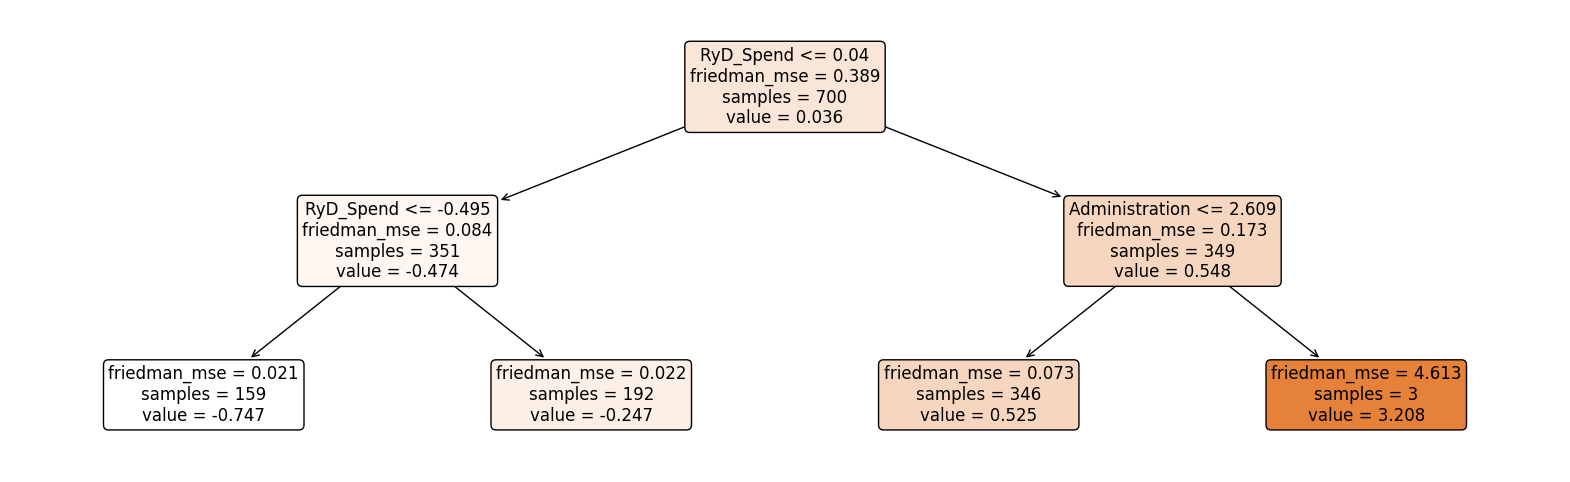

In [167]:
features = feature_list

plt.figure(figsize=(20,6))
tree.plot_tree(regressor_tree,
                feature_names=features,
                fontsize=12,
                filled=True,
                rounded=True)
plt.show()

### Pruebas variando los hiperparámetros

Text(0.5, 1.0, 'MSE segun distintos valores de max_depth')

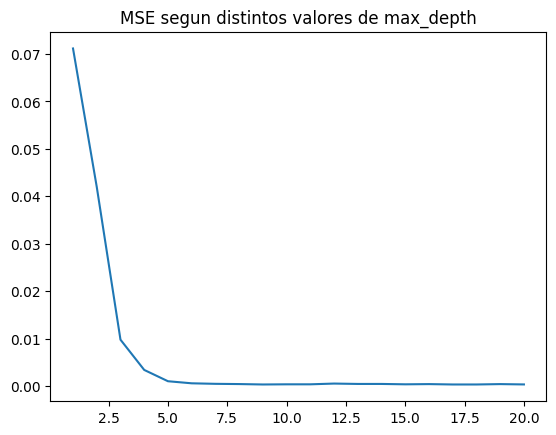

In [172]:
mse_max_depth = {}
for i in range(1,21):
    clf = tree.DecisionTreeRegressor(max_depth=i,min_samples_leaf=3, min_samples_split=5, criterion='friedman_mse')
    regressor_tree = clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    mse_max_depth[i]=mean_squared_error(y_test, predictions)
plt.plot(mse_max_depth.keys(), mse_max_depth.values())
plt.title("MSE segun distintos valores de max_depth")

Text(0.5, 1.0, 'MSE según distintos valores de min_samples_leaf')

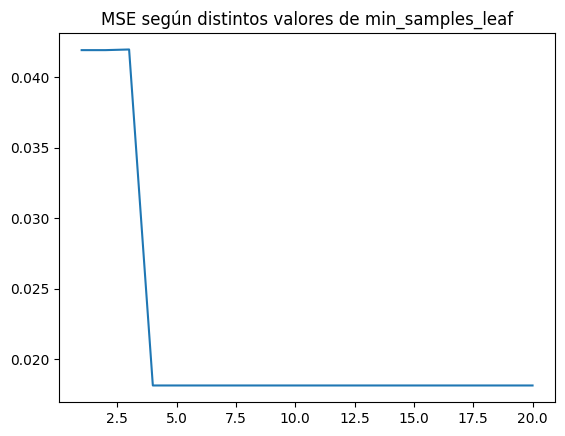

In [173]:
mse_min_samples_leaf = {}
for i in range(1,21):
    clf = tree.DecisionTreeRegressor(max_depth=2,min_samples_leaf=i, min_samples_split=5, criterion='friedman_mse')
    regressor_tree = clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    mse_min_samples_leaf[i]=mean_squared_error(y_test, predictions)
plt.plot(mse_min_samples_leaf.keys(), mse_min_samples_leaf.values())
plt.title("MSE según distintos valores de min_samples_leaf")

Text(0.5, 1.0, 'MSE según distintos valores de min_samples_split')

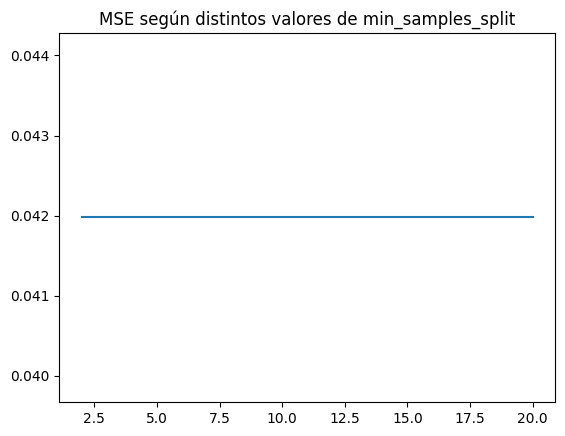

In [174]:
mse_min_samples_split = {}
for i in range(2, 21):
    clf = tree.DecisionTreeRegressor(max_depth=2,min_samples_leaf=3, min_samples_split=i, criterion='friedman_mse')
    regressor_tree = clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    mse_min_samples_split[i]=mean_squared_error(y_test, predictions)

plt.plot(mse_min_samples_split.keys(), mse_min_samples_split.values())
plt.title("MSE según distintos valores de min_samples_split")

Text(0.5, 1.0, 'MSE según criterio utilizado')

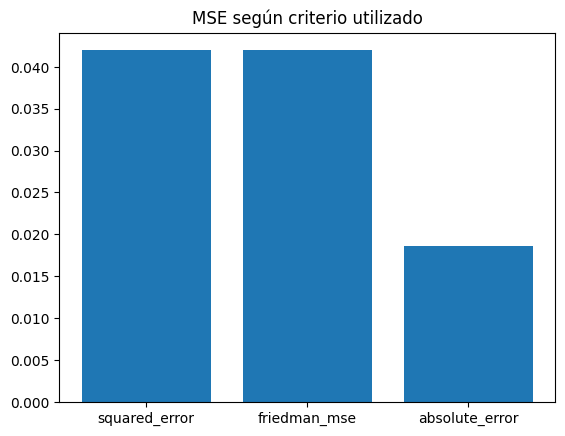

In [175]:
mse_criterion = {}
for i in ['squared_error', 'friedman_mse', 'absolute_error']:
    clf = tree.DecisionTreeRegressor(max_depth=2,min_samples_leaf=3, min_samples_split=5, criterion=i)
    regressor_tree = clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    mse_criterion[i]=mean_squared_error(y_test, predictions)

plt.bar(mse_criterion.keys(), mse_criterion.values())
plt.title("MSE según criterio utilizado")

Notamos que evaluando los hiperparámetros por separado obtuvimos resultados muy distintos a los logrados con la optimización de hiperparámetros, sin embargo es posible que esto se deba a que para realizar estas evaluaciones individuales tuvimos que dejar fijos los demás hiperparámetros.

# Árbol de Decisión - Clasificación

In [181]:
pokemones = pd.read_csv('PokemonDB.csv')
pokemones

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,45,49,49,65,65,45
1,Ivysaur,Grass,60,62,63,80,80,60
2,Venusaur,Grass,80,82,83,100,100,80
3,Venusaur,Grass,80,100,123,122,120,80
4,Charmander,Fire,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...
1185,Chi-Yu,Dark,55,80,80,135,120,100
1186,Roaring Moon,Dragon,105,139,71,55,101,119
1187,Iron Valiant,Fairy,74,130,90,120,60,116
1188,Koraidon,Fighting,100,135,115,85,100,135


## Análisis Exploratorio

### Distribuciones de las variables

array([[<Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Attack'}>],
       [<Axes: title={'center': 'Defense'}>,
        <Axes: title={'center': 'Sp. Atk'}>],
       [<Axes: title={'center': 'Sp. Def'}>,
        <Axes: title={'center': 'Speed'}>]], dtype=object)

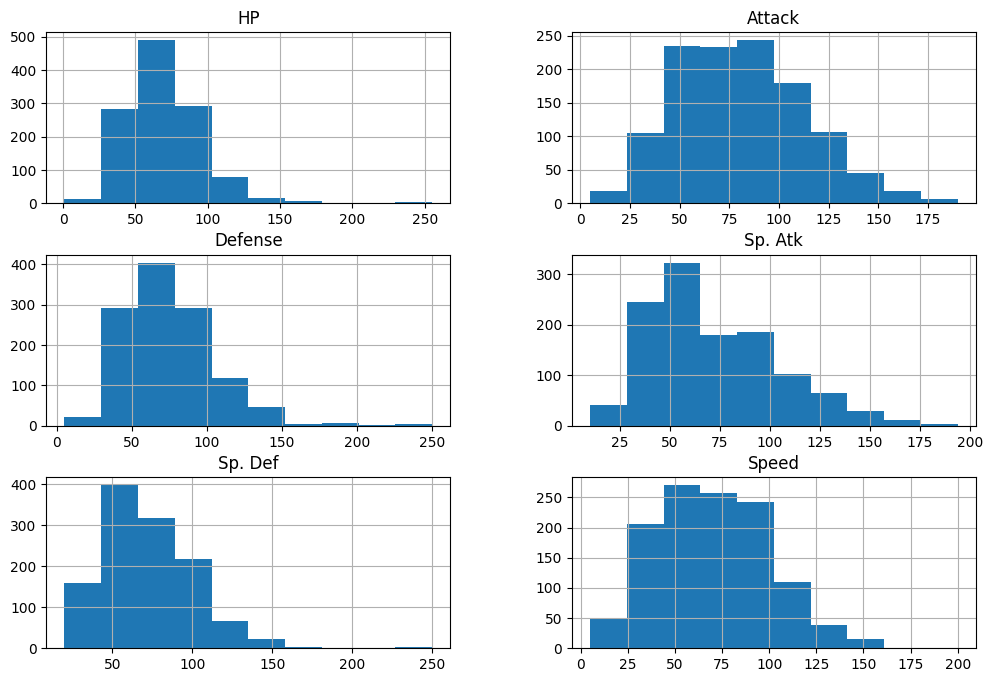

In [186]:
# Hacer gtrafico de densidad para cada numerica
pokemones.hist(figsize=(12,8))

### Valores nulos

In [197]:
pokemones.isnull().any()

Name       False
Type       False
HP         False
Attack     False
Defense    False
Sp. Atk    False
Sp. Def    False
Speed      False
dtype: bool

### Valores Atípicos

In [187]:
pokemones.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,70.852941,80.957983,74.586555,72.756303,72.050420,69.695798
std,26.886443,32.119650,30.718212,32.658636,27.637522,30.204376
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,51.250000,56.000000,51.000000,50.000000,50.000000,45.000000
50%,70.000000,80.000000,70.000000,65.000000,70.000000,67.000000
75%,85.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


Observando los valores de las medianas de cada variable y sus valores máximos podemos ver fácilmente que el conjunto de datos posee valores atípicos. Para observarlo de una manera más fácil, lo visualizaremos.

<Axes: >

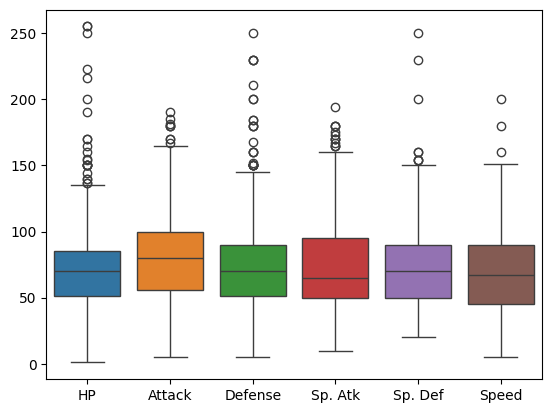

In [188]:
sns.boxplot(pokemones)

Esta información será tenida en cuenta a la hora de realizar un escalado de los datos.

### Tipos de Datos

In [189]:
pokemones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     1190 non-null   object
 1   Type     1190 non-null   object
 2   HP       1190 non-null   int64 
 3   Attack   1190 non-null   int64 
 4   Defense  1190 non-null   int64 
 5   Sp. Atk  1190 non-null   int64 
 6   Sp. Def  1190 non-null   int64 
 7   Speed    1190 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 74.5+ KB


### Matriz de correlación

In [194]:
matrizCorrelacion = pokemones.drop(['Name','Type'], axis = 1).corr(method='spearman')
matrizCorrelacion

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.588420,0.476119,0.454221,0.488317,0.260462
Attack,0.588420,1.000000,0.527037,0.326323,0.326617,0.369541
Defense,0.476119,0.527037,1.000000,0.314865,0.594502,0.075910
Sp. Atk,0.454221,0.326323,0.314865,1.000000,0.575338,0.422457
Sp. Def,0.488317,0.326617,0.594502,0.575338,1.000000,0.274487
Speed,0.260462,0.369541,0.075910,0.422457,0.274487,1.000000


<Axes: >

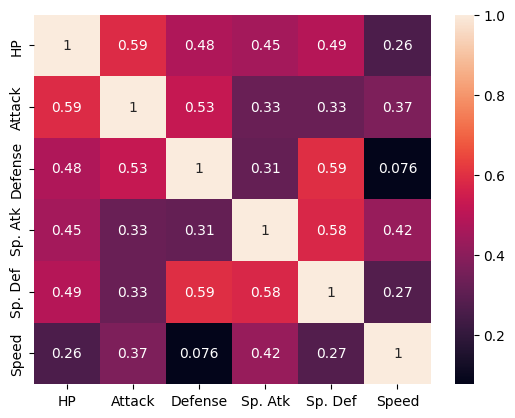

In [196]:
sns.heatmap(matrizCorrelacion, annot=True)

### Balanceo del conjunto de datos

El conjunto de datos se encuentra desbalanceado. Esto puede afectar al modelo a la hora de clasificar.

In [229]:
pokemones.Type.value_counts()

Type
Water       149
Normal      131
Grass       104
Bug          91
Psychic      82
Fire         75
Electric     73
Rock         67
Dark         56
Fighting     49
Dragon       47
Ghost        47
Poison       46
Ground       46
Ice          43
Steel        43
Fairy        31
Flying       10
Name: count, dtype: int64

## División del conjunto de datos

In [198]:
df = pokemones.drop('Name', axis=1)

In [199]:
df_train, df_temp = train_test_split(df, test_size=0.3)

In [202]:
df_val, df_test = train_test_split(df_temp, test_size=0.5)

In [205]:
pokemones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     1190 non-null   object
 1   Type     1190 non-null   object
 2   HP       1190 non-null   int64 
 3   Attack   1190 non-null   int64 
 4   Defense  1190 non-null   int64 
 5   Sp. Atk  1190 non-null   int64 
 6   Sp. Def  1190 non-null   int64 
 7   Speed    1190 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 74.5+ KB


In [206]:
X_train = df_train.drop('Type', axis=1)
y_train = df_train.Type

X_val = df_val.drop('Type', axis=1)
y_val = df_val.Type

X_test = df_test.drop('Type', axis=1)
y_test = df_test.Type

# Escalado de los datos

Debido a la presencia de valores atípicos utilizaremos un escalado robusto.

In [211]:
escalador = RobustScaler()

def escalar(X):
       transformer = RobustScaler().fit(X)
       arr = transformer.transform(X)
       df = pd.DataFrame(arr, columns=X.columns)
       return df

In [213]:
X_train_escalado = escalar(X_train)
X_val_escalado = escalar(X_val)
X_test_escalado = escalar(X_test)

## Modelo base

In [218]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [214]:
modeloBase = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=1, min_samples_split=2, random_state=130)

In [221]:
regressor_tree = modeloBase.fit(X_train, y_train)
predictionsVal = regressor_tree.predict(X_val)
predictionsTest = regressor_tree.predict(X_test)

In [226]:
accuracy_score(y_val, predictionsVal)

0.17415730337078653

In [224]:
precision = precision_score(y_val, predictionsVal, average='weighted', zero_division=0)
precision

0.06959697117733267

In [227]:
print(f"Precisión Validación: {precision_score(y_val, predictionsVal, average='weighted', zero_division=0)}")
print(f"Precisión Test: {precision_score(y_test, predictionsTest, average='weighted', zero_division=0)}\n")

print("Recall Validación: ",recall_score(y_val, predictionsVal, average='weighted'))
print("Recall Test: ", recall_score(y_test, predictionsTest, average='weighted'),"\n")

print("Accuracy Validación: ", accuracy_score(y_val, predictionsVal))
print("Accuracy Test: ",accuracy_score(y_test, predictionsTest))

Precisión Validación: 0.06959697117733267
Precisión Test: 0.05858774047559986

Recall Validación:  0.17415730337078653
Recall Test:  0.1452513966480447 

Accuracy Validación:  0.17415730337078653
Accuracy Test:  0.1452513966480447


## Optimización de Hiperparámetros
Mediante la utilización de GridSearch

In [230]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'max_depth': [None, 5, 10, 15,20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Inicializar la búsqueda en cuadrícula
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Realizar la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15, 20]})

In [231]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 20}


## Evaluación en validación y test

In [232]:
clf = DecisionTreeClassifier(criterion='gini', max_depth = 10, min_samples_leaf = 4, min_samples_split = 20)
regressor_tree = clf.fit(X_train, y_train)
predictionsVal = regressor_tree.predict(X_val)
predictionsTest = regressor_tree.predict(X_test)

In [233]:
print(f"Precisión Validación: {precision_score(y_val, predictionsVal, average='weighted', zero_division=0)}")
print(f"Precisión Test: {precision_score(y_test, predictionsTest, average='weighted', zero_division=0)}\n")

print("Recall Validación: ",recall_score(y_val, predictionsVal, average='weighted'))
print("Recall Test: ", recall_score(y_test, predictionsTest, average='weighted'),"\n")

print("Accuracy Validación: ", accuracy_score(y_val, predictionsVal))
print("Accuracy Test: ",accuracy_score(y_test, predictionsTest))

Precisión Validación: 0.17834780903295802
Precisión Test: 0.15561242977179077

Recall Validación:  0.17415730337078653
Recall Test:  0.1787709497206704 

Accuracy Validación:  0.17415730337078653
Accuracy Test:  0.1787709497206704


Al conservar resultados muy similares tanto en validación como en test, vemos que el modelo no está overfitteado.

## Visualizaicón

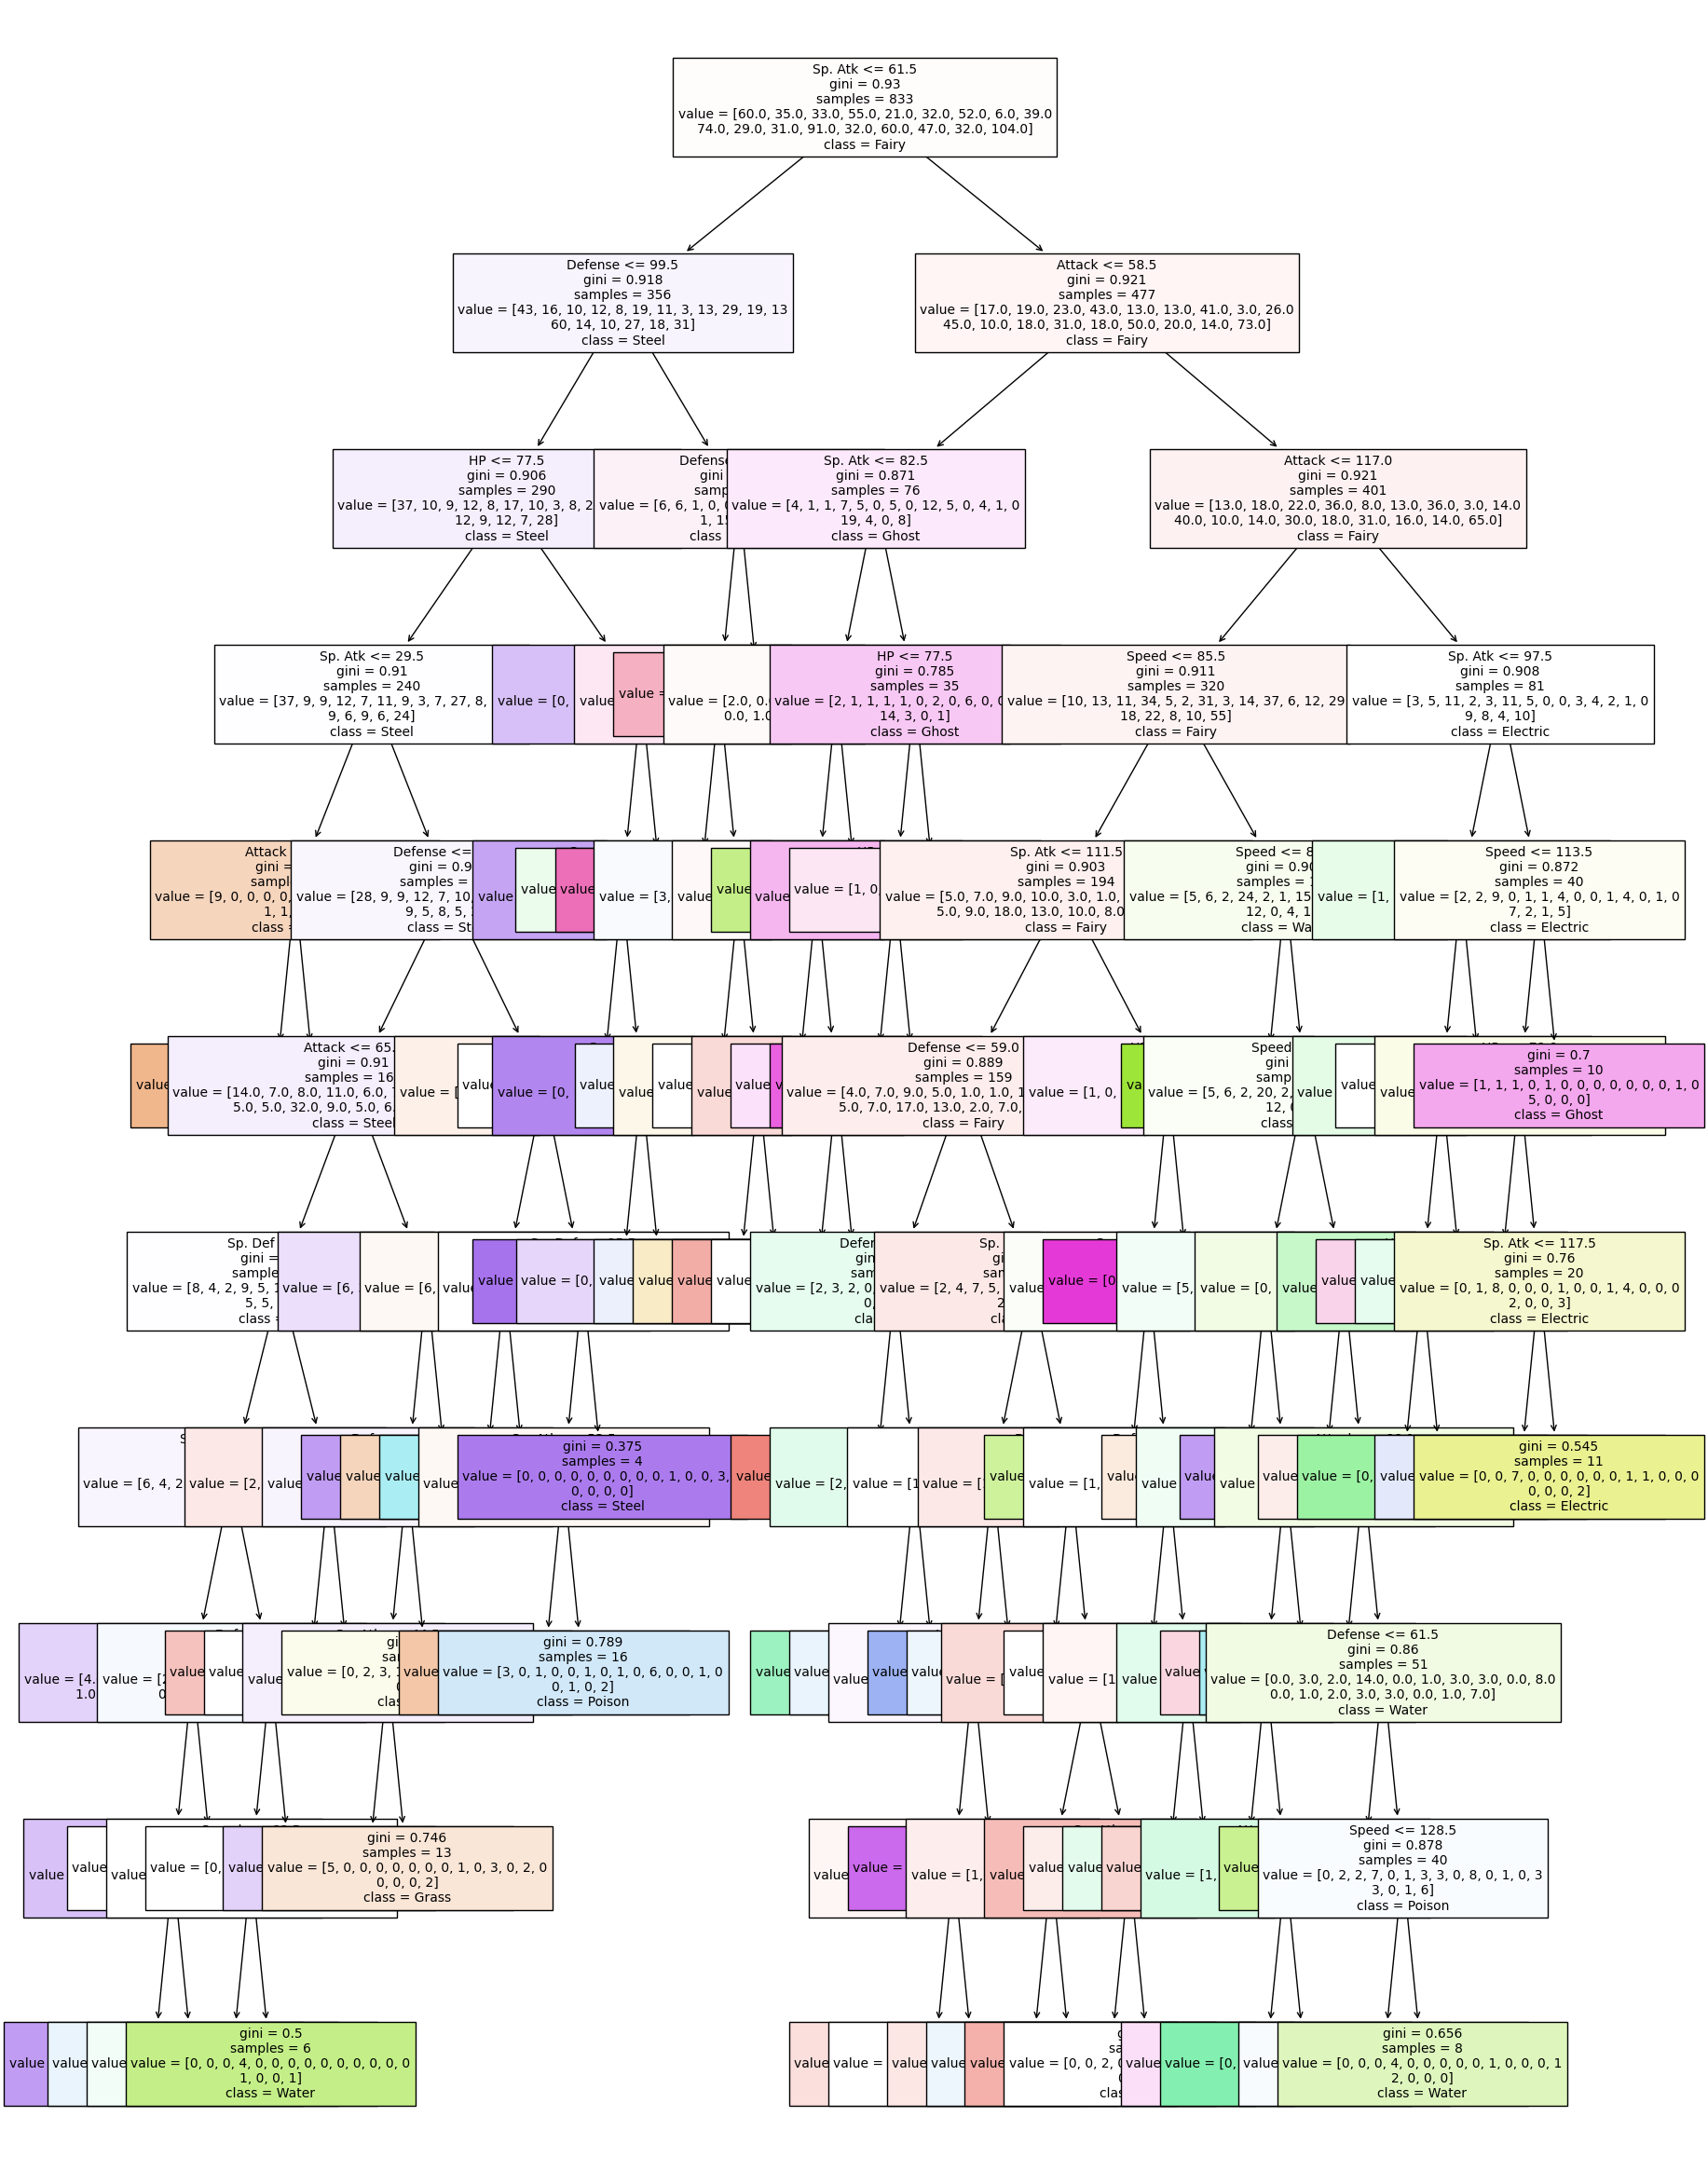

In [254]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Graficar el árbol entrenado
plt.figure(figsize=(20, 30))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=y_train.unique(), fontsize = 10)
plt.show()


In [239]:
!pip install graphviz


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 47.1/47.1 kB 1.2 MB/s eta 0:00:00


In [242]:
from graphviz import Source
tree.export_graphviz(clf, out_file="pokemones.dot", 
feature_names=X_train.columns,
class_names=y_train.unique(), rounded=True, 
filled=True)

In [250]:
Source.from_file("pokemones.dot")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

# Bayes Ingenuo - Clasificación
Estimar Type

# K-NN
Estimar Type